#PERIOD OF A PENDULUM

This Google Colaboration notebook uses the programming language Python. You don't need to understand how to program in Python yourself to use this notebook. Instead, we will explain what each cell does and where you will need to make edits. Think of it as a **tool** that we'll use to do calculations and produce plots.

There are some preliminary cells (which you should run first everytime you start the notebook) followed by separate sections for each part of the experiment. Each part is self-contained, so you only need to run the preliminary cells and then the code within that section; you will not need to run anything in Part 1, for example, if you are working on Part 2.

This particular cell is a **text** cell, but you'll notice that some of the cells below contain **code**. To exectute the code inside a cell, click the cell and press `shift+enter` or click the run icon that appears when hovering over the top-left corner of the cell. Run the cells wihin a section from top to bottom, stopping to read the notes before/after each cell to make sure you know what is going on.

Try it with the cell below! Execute it by pressing `shift+enter` (and selecting "Run Anyway" if a warning box pops up).

In [ ]:
print('Hello World')

Hello World


Now run the preliminary cells and move on to Part 1!

*Note that if the cells below are collapsed, you can click the little triangle next to the header to expand the cells*.

# Preliminary cells
Run the following cells **every time** you start the notebook and before moving on to any individual part.

These cells load libraries and defines some useful functions. Later when you have more time, you can look closely at the code and try to understand what it is doing, but for now you can just run the cells by clicking `shift+enter` and moving on. (There is no output.)

In [ ]:
# These lines load important libraries into memory
import numpy as np
from matplotlib import pyplot as plt

# Below are several functions we want to define
def average(x):
    sum = 0                  # initializes our running total to be zero and calls it "sum"
    for number in x:         # makes a loop over the list "x" 
        sum = sum + number   # adds the current item in the list (called "number" to the running total (called "sum")
    return(sum / len(x))     # divides the total by the number of items in the list

def standard_deviation(x):
    avg = average(x)
    variance = 0                                # initializes our running total to be zero and calls it "variance"
    for number in x:                            # makes a loop over the list "x" 
        variance = variance + (number - avg)**2 # adds the square of the difference between each item and the average  
    return(np.sqrt(variance/(len(x)-1)))        # divides the total by N-1

def standard_error(x):
    return(standard_deviation(x))/np.sqrt(len(x)) # divides the standard deviation by sqrt of the number of points

def t_prime(A, dA, B, dB=0):               # Calculates the t_prime value between A +/- dA and B +/- B
    return((A-B)/np.sqrt(dA**2 + dB**2))   # If only 3 arguments are given, assumes dB = 0 (e.g. a literature value)

In [ ]:
# These lines control how our figures look
%matplotlib inline
plt.rcParams['figure.dpi'] = 160 #Change this value to make your picture bigger or smaller

# Part 1 -- Dropping paper
You can use these cells to calculate the statistics for your paper drop times (mean, standard deviation and standard error) and then make a scatter plot to visualize the data.


The next cell contains a list of numbers inside square brackets. This will be where you enter your list of values for the measured drop times. **Edit** this cell to use your own times in units of *seconds*. Make sure that numbers are separated by commas and that the list is inside square brackets (e.g. `distance = [1.0, 2.2, 3.8]`).



In [ ]:
times = [17.2,19.7,12.6,19.1,20.6,17.9,19.4,21.5,11.7,23.2,24.1,22.8,16.9,12.4,14.8,17.6,20,21.1,24.6,16.7,26.1]

Let's perform some calculations on your data.

In [ ]:
mean = average(times)
std_dev = standard_deviation(times)
std_err = standard_error(times)

print("Average fall time is {:0.2f} sec".format(mean))
print("Standard deviation is {:0.2f} sec".format(std_dev))
print("Standard error (SE) is {:0.2f} sec".format(std_err))

Average fall time is 19.05 sec
Standard deviation is 4.04 sec
Standard error (SE) is 0.88 sec


Finally, let's make a scatter plot of your data. 

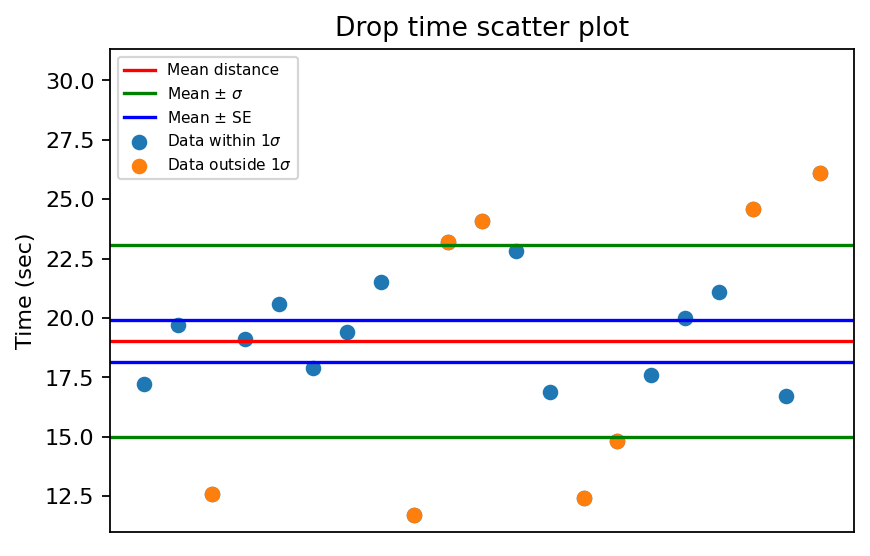

In [ ]:
index = np.linspace(1,len(times),len(times))
fig,ax = plt.subplots()
ax.scatter(index,times,label = "Data within 1$\sigma$")
ax.axhline(mean,color='r',label="Mean distance")
ax.axhline(mean+std_dev,color='g',label="Mean $\pm$ $\sigma$")
ax.axhline(mean-std_dev,color='g')
ax.axhline(mean+std_err,color='b',label="Mean $\pm$ SE")
ax.axhline(mean-std_err,color='b')

times = np.array(times)
outside_sigma = np.logical_or( times > mean+std_dev, times < mean-std_dev)
ax.scatter(index[outside_sigma], times[outside_sigma],
           label = "Data outside 1$\sigma$")

ax.set_title("Drop time scatter plot")
ax.set_ylabel("Time (sec)")
ax.set_ylim(top=1.2*max(times))
plt.xticks([])
ax.legend(fontsize="x-small")
plt.show()

Now save your image (right click and select "save as") and put a copy in your lab notebook!

# Part 1 -- Building a pendulum
You may now use this section to compute statistics and plot your period for your pendulum.

**Edit** the first line here by entering the length of the pendulum. The rest of the code will will calculate the predicted period.

In [ ]:
# L is the length of your pendulum (in meters)
L = 0.81

# T_predicted is the value of the period predicted from the formula (in seconds)
T_predicted = 2*np.pi*np.sqrt(L/9.81)

print("Predicted Period: T = ", T_predicted, "seconds")

Predicted Period: T =  1.8054600126395828 seconds


Enter the list of measured periods for $5^{\circ}$ and $10^{\circ}$.

In [ ]:
# T5 and T10 are lists of your measured periods of 5 and 10 degrees, respectively
T5 = [1.85, 1.90, 1.80, 1.75]
T10 = [1.83, 1.88, 1.76, 1.74]

print("periods at 5 degrees:", T5)
print("periods at 10 degrees:", T10)

periods at 5 degrees: [1.85, 1.9, 1.8, 1.75]
periods at 10 degrees: [1.83, 1.88, 1.76, 1.74]


Next, compute the average and standard error for these two lists of data.

In [ ]:
avg5 = average(T5)
avg10 = average(T10)

davg5 = standard_error(T5)
davg10 = standard_error(T10)

print("T_5 = ", avg5, "+/-", davg5)
print("T_10 = ", avg10, "+/-", davg10)

T_5 =  1.825 +/- 0.03227486121839513
T_10 =  1.8025 +/- 0.03224257020358849


Next, we can plot the data against the predicted value.

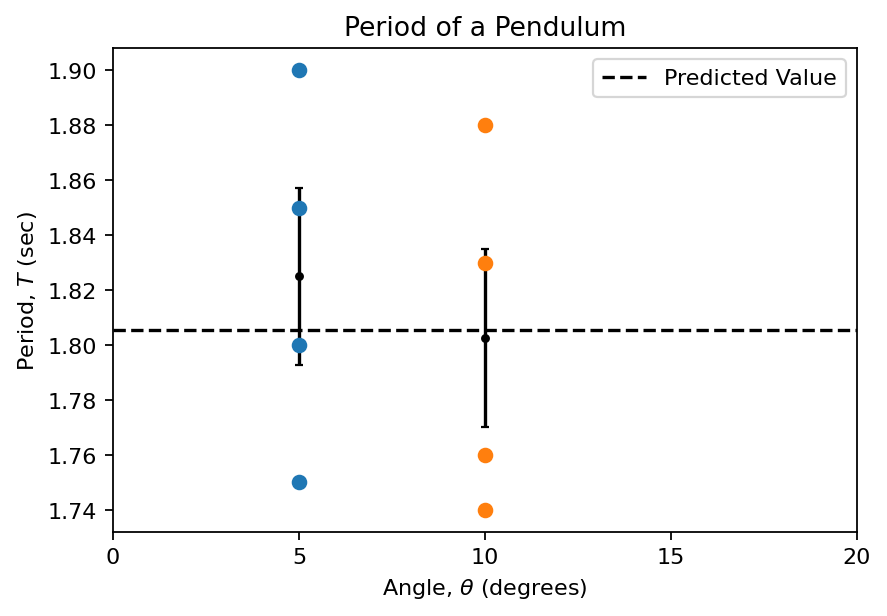

In [ ]:
plt.figure()
plt.axhline(T_predicted, color = 'black', linestyle='--', label='Predicted Value')
plt.plot(5*np.ones(len(T5)), T5, 'o')
plt.plot(10*np.ones(len(T10)), T10, 'o')
plt.errorbar([5, 10], [avg5, avg10], [davg5, davg10], fmt = 'k.', capsize=2)
plt.xlabel("Angle, $\\theta$ (degrees)")
plt.ylabel("Period, $T$ (sec)")
plt.title("Period of a Pendulum")
plt.xlim([0, 20])
plt.xticks([0,5,10,15,20])
plt.legend()
plt.show()

Finally, we check the $t^{\prime}$ value at each angle to see if we have agreement with the predicted value.

In [ ]:
print("For 5 degrees, t' =", t_prime(avg5, davg5, T_predicted))
print("For 10 degrees, t' =", t_prime(avg10, davg10, T_predicted))

For 5 degrees, t' = 0.6054243650559934
For 10 degrees, t' = -0.09180448769724157


# Part 2 -- Individual measurements for larger $\theta$
As you continue your experiment on Day 2, you may use this section to continue plotting your period data.

**Edit** the first line here by entering the length of the pendulum. The rest of the code will will calculate the predicted period.

In [ ]:
# L is the length of your pendulum (in meters)
L = 0.81

# T_predicted is the value of the period predicted from the formula (in seconds)
T_predicted = 2*np.pi*np.sqrt(L/9.81)

print("Predicted Period: T = ", T_predicted, "seconds")

Predicted Period: T =  1.8054600126395828 seconds


Continue adding data at larger angles. We have created some empty lists, but you can add lists at any angle by following the naming pattern.

- Create a new blank list of the form `Txx` where `xx` is the angle (in degrees)
- Add that angle (in degrees) to the list `angles`
- Add the new angle to the list `angles_All` and the period to the list `T_All`

In [ ]:
# T5 and T10 are lists of your measured periods of 5 and 10 degrees, respectively

T5 = [1.85, 1.90, 1.80, 1.75]
T10 = [1.83, 1.88, 1.76, 1.74]
T15 = []
T20 = []
T25 = []
T30 = []

# T_All is a list of lists
angles_All = [5, 10, 15, 20, 25, 30]
T_All = [T5,T10,T15,T20,T25,T30]

Next we compute the average period and uncertainty for each angle.

In [ ]:
angles = []
avg = []
davg = []

print("Predicted T = ", T_predicted, "seconds")
# This loop goes through all of your data and finds the average and standard deviation of the mean for each angle.
for n,T in enumerate(T_All):
    if len(T)>0:
        angles.append(angles_All[n])
        avg.append(average(T))
        davg.append(standard_error(T))
        print("T at", angles[n],"degrees = ", avg[n], "+/-", davg[n], "seconds")

Predicted T =  1.8054600126395828 seconds
T at 5 degrees =  1.825 +/- 0.03227486121839513 seconds
T at 10 degrees =  1.8025 +/- 0.03224257020358849 seconds


Next, we plot the data.

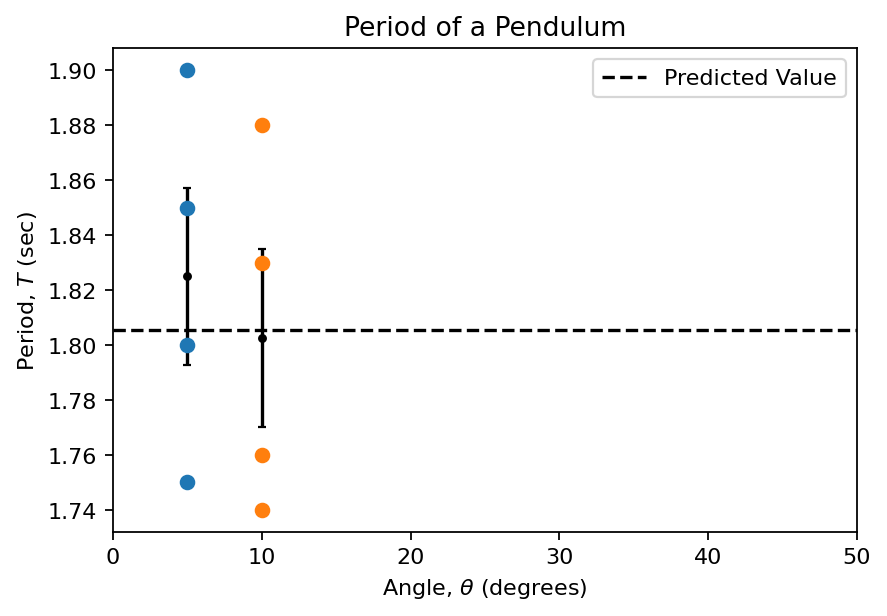

In [ ]:
plt.figure()
plt.axhline(T_predicted, color = 'black', linestyle='--', label='Predicted Value')

for n,T in enumerate(T_All):
    if len(T)>0:
        plt.plot(angles[n]*np.ones(len(T)), T, 'o')
        # this plots your data points for each angle

plt.errorbar(angles, avg, davg, fmt = 'k.', capsize=2)
    #this plots the average and standard deviation of the mean for each angle
plt.xlabel("Angle, $\\theta$ (degrees)")
plt.ylabel("Period, $T$ (sec)")
plt.title("Period of a Pendulum")
plt.xlim([0, 50])
plt.legend()
plt.show()

Finally, check the $t^{\prime}$ value at each angle to see if we have agreement.

In [ ]:
for n, theta in enumerate(angles):
    print("For", theta, "degrees, t' =", t_prime(avg[n], davg[n], T_predicted))

For 5 degrees, t' = 0.6054243650559934
For 10 degrees, t' = -0.09180448769724157


##Looking at an "improved" model

Now we can use a more sophisticated model for the predicted period. This model *depends* on angle, and therefore we need to compute the predicted period separately for each angle.

We won't derive the formula here, but the full solution model comes from solving a differential equation that involves *all* the forces acting on the pendulum mass:

$T = 2\pi\sqrt{\frac{L}{g}} \bigg(\frac{K(\sin(\theta/2))}{\pi/2}\bigg)$

where

$K(x) = \int_0^{\pi/2} \frac{\textrm{d}u}{\sqrt{1-x^2\sin^2 u}}$

is a so-called *elliptical integral*. This integral has no closed-form solution, so the best we can do is rewrite it in terms of Legendre Polynomials and perform a Taylor expansion around zero angle. This gives the following approximation:

$T = 2\pi\sqrt{\frac{L}{g}}\bigg[1 + \frac{1}{4}\sin^2(\theta/2) + \frac{9}{64}\sin^4(\theta/2)+\ldots\bigg]$

This approximation has an infinite number of terms. We can see whether adding the additional two terms shown here improves the agreement between the experimental data and the model. 

In [ ]:
def T_predicted_expanded(ell, x):
    theta = x*np.pi/180
    return 2*np.pi*np.sqrt(ell/9.81)*(1 + 1/4*np.sin(theta/2)**2 + 9/64*np.sin(theta/2)**4)

# T_predicted is the value of the period predicted from the formula (in seconds)
for n, theta in enumerate(angles):
    print("Theta = ", theta, "degrees // Predicted Period: T = ", T_predicted_expanded(L, theta), "seconds")

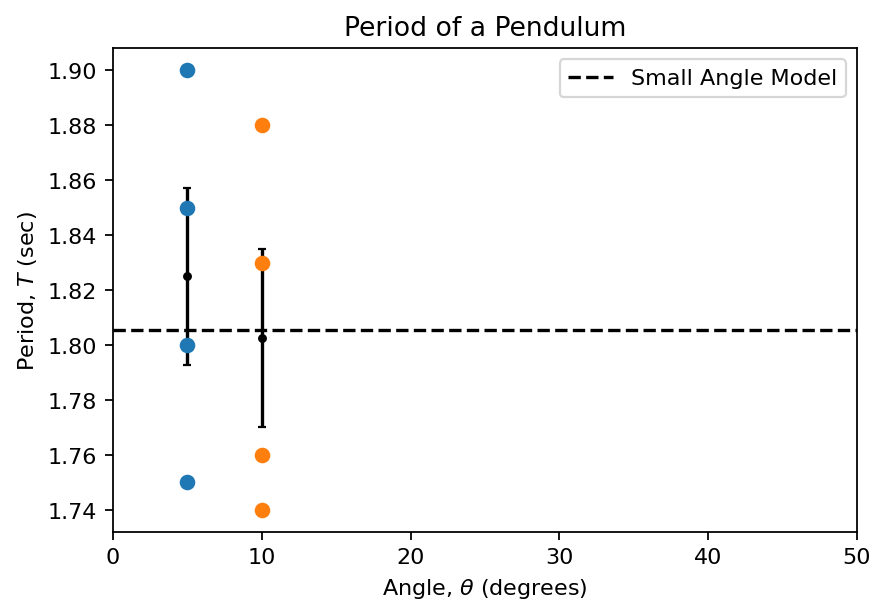

In [ ]:
plt.figure()
plt.axhline(T_predicted, color = 'black', linestyle='--', label='Small Angle Model')
ANGLES = np.linspace(0, 50, 500)
plt.plot(ANGLES, T_predicted_expanded(L, ANGLES), 'k-', label='General Model')

for n,T in enumerate(T_All):
    if len(T)>0:
        plt.plot(angles[n]*np.ones(len(T)), T, 'o')
        # this plots your data points for each angle

plt.errorbar(angles, avg, davg, fmt = 'k.', capsize=2)
    #this plots the average and standard deviation of the mean for each angle
plt.xlabel("Angle, $\\theta$ (degrees)")
plt.ylabel("Period, $T$ (sec)")
plt.title("Period of a Pendulum")
plt.xlim([0, 50])
plt.legend()
plt.show()

Finally, we can perform the $t^{\prime}$ test on each point.

In [ ]:
for n, theta in enumerate(angles):
    print("For", theta, "degrees, t' =", t_prime(avg[n], davg[n],
          T_predicted_expanded(L,theta)))

For 5 degrees, t' = 0.5787872507840002
For 10 degrees, t' = -0.19859728292891166
